# Submit to the competition

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on **[this link](https://www.kaggle.com/c/home-data-for-ml-course)**.  Then click on the **Join Competition** button.

![join competition image](https://storage.googleapis.com/kaggle-media/learn/images/axBzctl.png)

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Data** tab near the top of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Continue Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  To add more features to the data, revisit the first code cell, and change this line of code to include more column names:
```python
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
```

Some features will cause errors because of issues like missing values or non-numeric data types.  Here is a complete list of potential columns that you might like to use, and that won't throw errors:
- 'MSSubClass'
- 'LotArea'
- 'OverallQual' 
- 'OverallCond' 
- 'YearBuilt'
- 'YearRemodAdd' 
- '1stFlrSF'
- '2ndFlrSF' 
- 'LowQualFinSF' 
- 'GrLivArea'
- 'FullBath'
- 'HalfBath'
- 'BedroomAbvGr' 
- 'KitchenAbvGr' 
- 'TotRmsAbvGrd' 
- 'Fireplaces' 
- 'WoodDeckSF' 
- 'OpenPorchSF'
- 'EnclosedPorch' 
- '3SsnPorch' 
- 'ScreenPorch' 
- 'PoolArea' 
- 'MiscVal' 
- 'MoSold' 
- 'YrSold'

Look at the list of columns and think about what might affect home prices.  To learn more about each of these features, take a look at the data description on the **[competition page](https://www.kaggle.com/c/home-data-for-ml-course/data)**.

After updating the code cell above that defines the features, re-run all of the code cells to evaluate the model and generate a new submission file.  


# What's next?

As mentioned above, some of the features will throw an error if you try to use them to train your model.  The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.

The **[Pandas](https://kaggle.com/Learn/Pandas)** course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/intro-to-Deep-Learning)** course, where you will build models with better-than-human level performance at computer vision tasks.

In [1]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)

# Potential features
"""features = ['MSSubClass', 'LotArea','OverallQual' ,'OverallCond','YearBuilt', 
    'YearRemodAdd','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea', 'FullBath','HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 
    'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold']"""

y = home_data.SalePrice
X = home_data.drop(columns=['SalePrice'])

**1. Data Exploration**: Start by exploring the dataset using summary statistics and visualization techniques to get an overview of the data distribution, missing values, and any potential outliers.

In [2]:
# Display the first few rows of the dataset
print(home_data.head())

# Check the dimensions of the dataset
print("Number of rows:", home_data.shape[0])
print("Number of columns:", home_data.shape[1])

# Summary statistics of numerical features
print(home_data.describe())

# Check for missing values in each column
print("Missing values per column:")
print(home_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

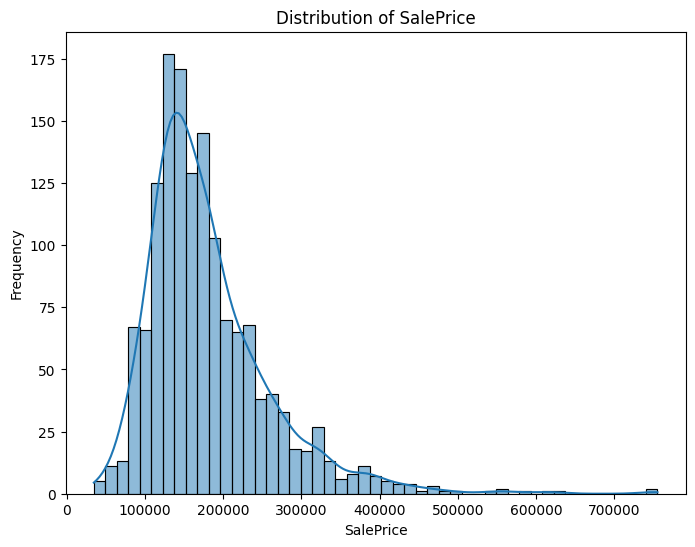

In [3]:
# Visualize the distribution of the target variable (SalePrice)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(home_data['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


C:\Users\Dani\AppData\Local\Temp;\ipykernel_23344\4046380069.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = home_data.corr()


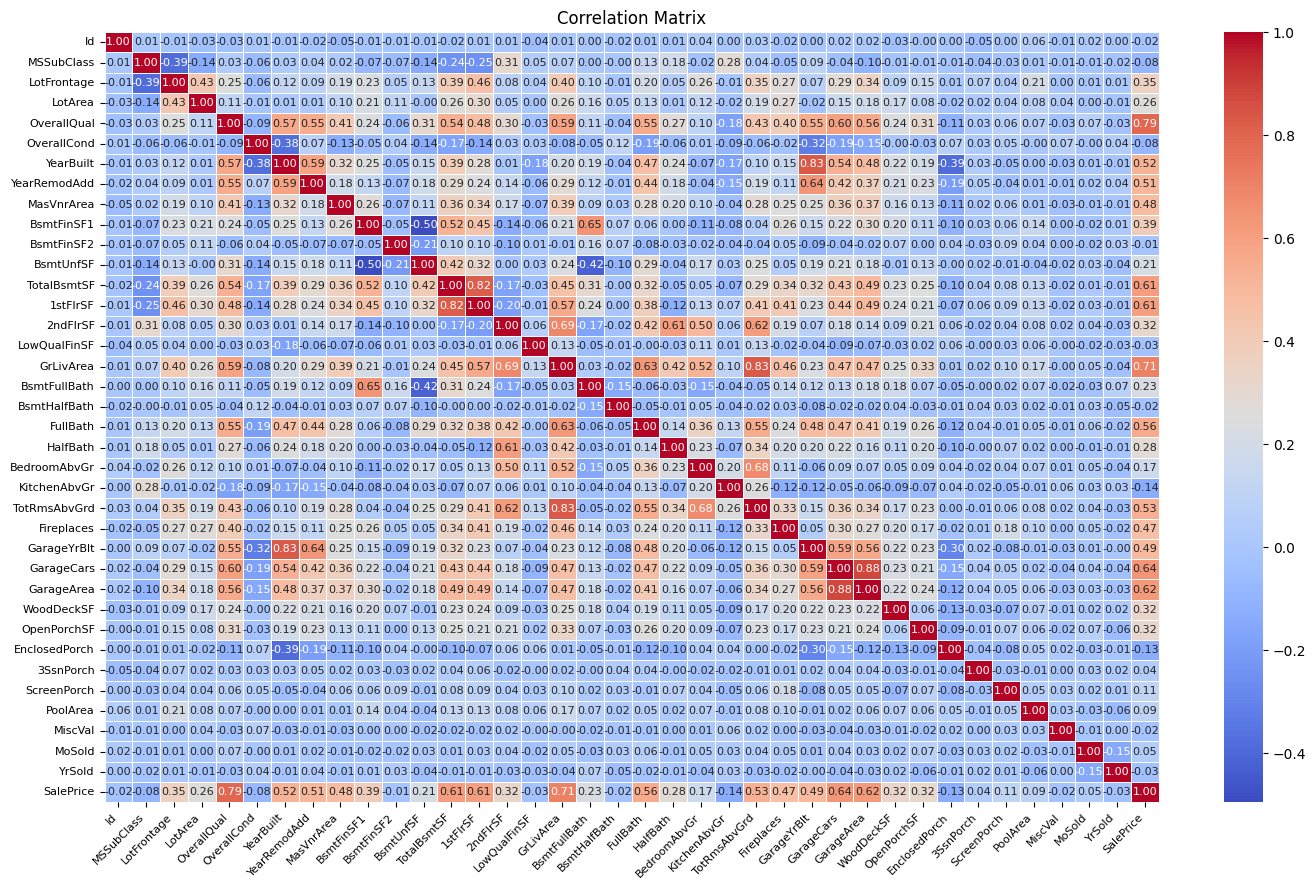

In [4]:
# Visualize the correlation matrix with improved readability
plt.figure(figsize=(17, 10))
correlation_matrix = home_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Correlation Matrix")
plt.show()

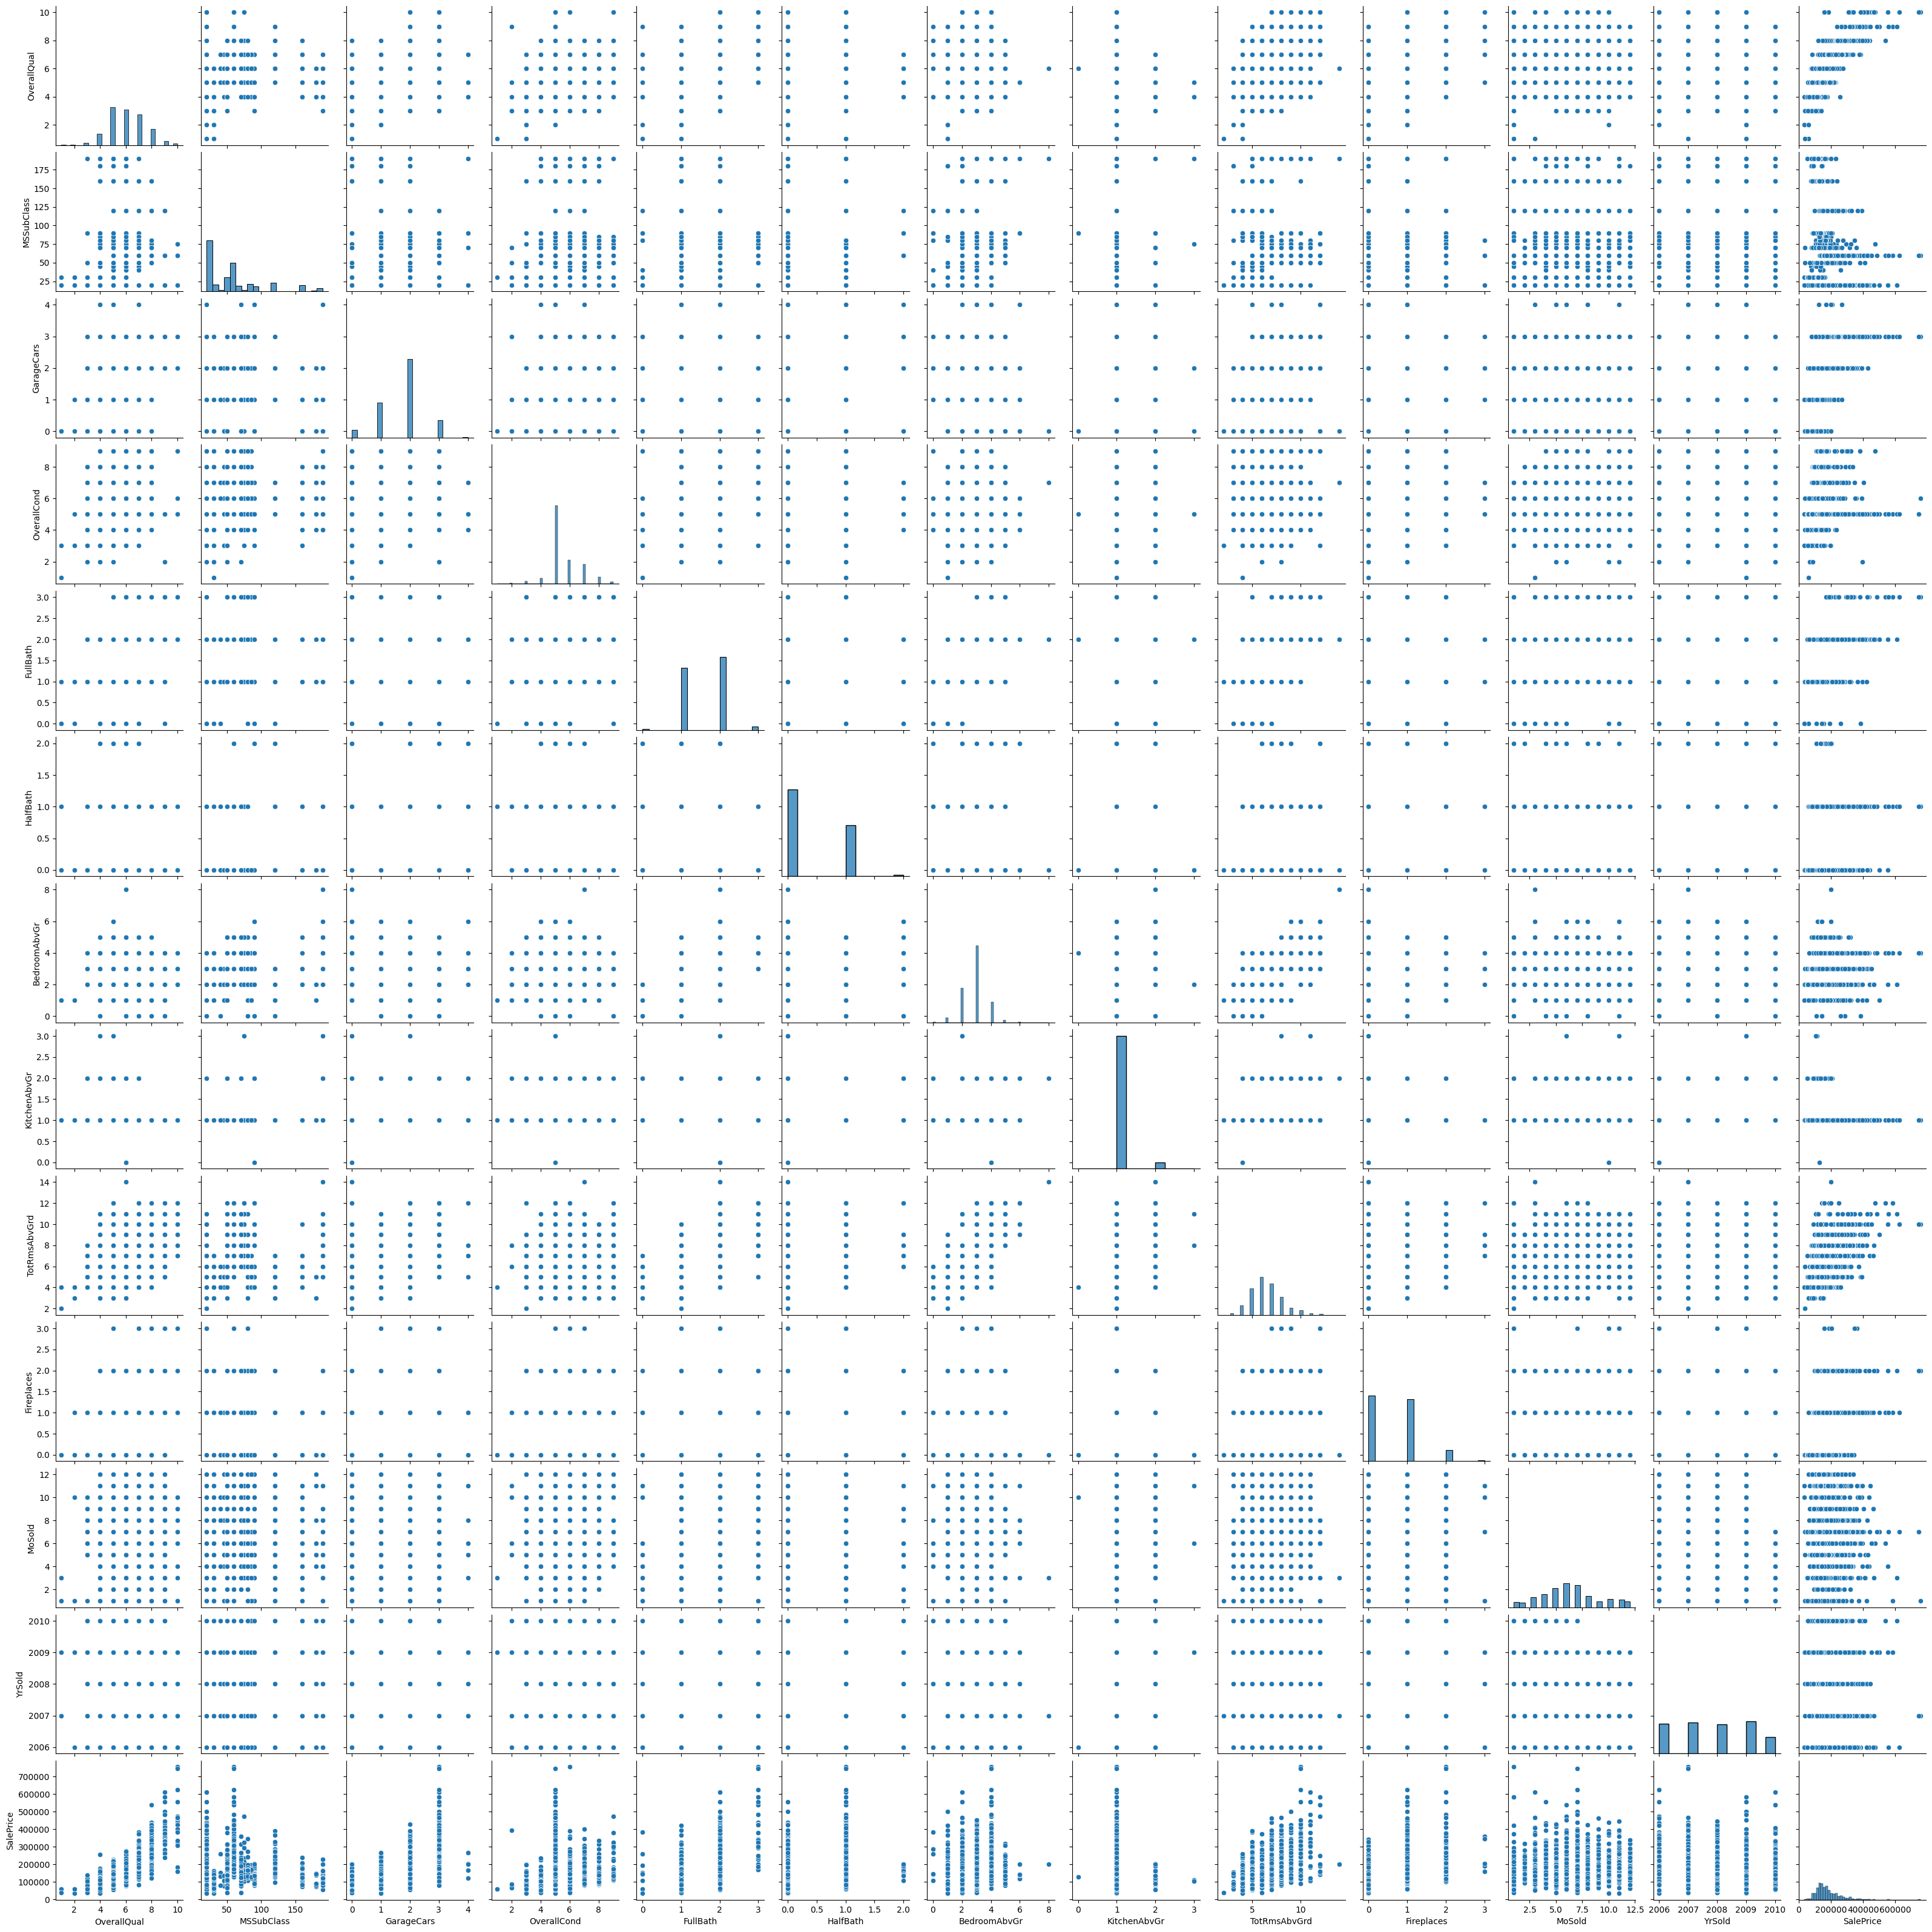

In [5]:
# Select a subset of features for the pair plot
discrete_features = ['OverallQual', 'MSSubClass', 'GarageCars', 'OverallCond', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'MoSold', 'YrSold', 'SalePrice']

# Filter the data to remove any rows with missing values in the selected features
filtered_data = home_data[discrete_features]

# Plot a pair plot with the filtered data
sns.pairplot(data=filtered_data, kind='scatter')
plt.show()

In [6]:
continuous_features = ['LotArea', 'GrLivArea',  'YearBuilt', 'YearRemodAdd','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'SalePrice']

**2. Data Preprocessing:**

Encoding categorical variables


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Select columns with categorical values
categorical_columns = home_data.select_dtypes(include='object').columns
"""# Display the unique elements of each column with categorical values
for column in categorical_columns:
    unique_elements = home_data[column].unique()
    print(f"Column '{column}': {unique_elements}")"""


# Step 1: Encoding Categorical Variables

# Use one-hot encoding to convert categorical variables into numerical format
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(home_data[categorical_columns]))
encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

"""# Display the unique elements of each column with categorical values
for column in encoded_data.columns:
    unique_elements = encoded_data[column].unique()
    print(f"Column '{column}': {unique_elements}")"""

# Replace the original categorical columns with the encoded data
home_data.drop(columns=categorical_columns, inplace=True)
home_data = pd.concat([home_data, encoded_data], axis=1)

# Step 2: Handling Missing Values

# Check for missing values in the preprocessed data
missing_values_count = home_data.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

# If there are missing values, decide on the best approach to handle them.
# For example, you can impute missing values with the most frequent value or remove rows with missing values.

# For illustration, let's impute missing values with the most frequent value.
home_data.fillna(home_data.mode().iloc[0], inplace=True)

# Check again for missing values after imputation
missing_values_count_after_imputation = home_data.isnull().sum()
print("Missing Values Count after Imputation:\n", missing_values_count_after_imputation)

X = home_data.drop(columns=['SalePrice'])

Missing Values Count:
 Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 263, dtype: int64
Missing Values Count after Imputation:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 263, dtype: int64


c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**3. Feature Importance Analysis**:  Use a RandomForestRegressor or other feature importance methods to determine the most significant features affecting the SalePrice. This analysis helps in feature selection and identifying the most influential factors.

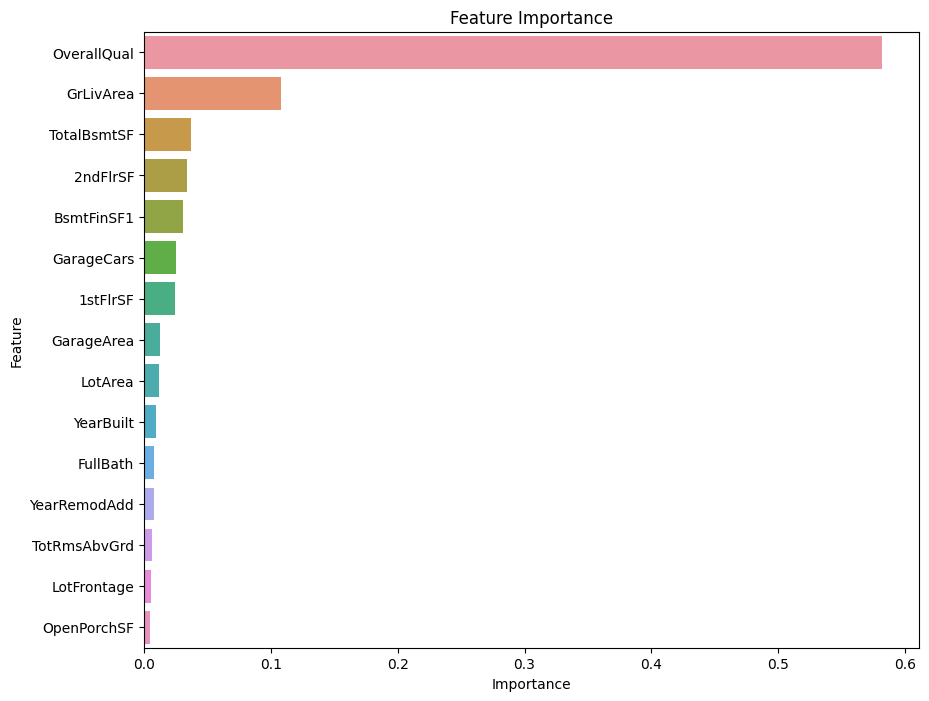

         Feature  Importance
4    OverallQual    0.581913
16     GrLivArea    0.108165
12   TotalBsmtSF    0.037201
14      2ndFlrSF    0.033606
9     BsmtFinSF1    0.030922
26    GarageCars    0.025592
13      1stFlrSF    0.024742
27    GarageArea    0.012862
3        LotArea    0.011794
6      YearBuilt    0.009232
19      FullBath    0.007941
7   YearRemodAdd    0.007842
23  TotRmsAbvGrd    0.006045
2    LotFrontage    0.005740
29   OpenPorchSF    0.004586
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)


In [20]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take the top 10 most important features
top_features = feature_importance_df.head(15)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(top_features)
print(X.columns)

**4. Correlation Analysis:** Calculate the correlation matrix of the features with the target variable and with each other. This will help you understand the strength and direction of the relationships between the features and the SalePrice.

In [21]:
# Calculate the correlation between each feature and the target variable (SalePrice)
correlation_with_saleprice = home_data[top_features.Feature].corrwith(home_data['SalePrice']).sort_values(ascending=False)

# Display the correlation values
print(correlation_with_saleprice)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF1      0.386420
LotFrontage     0.329220
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
dtype: float64


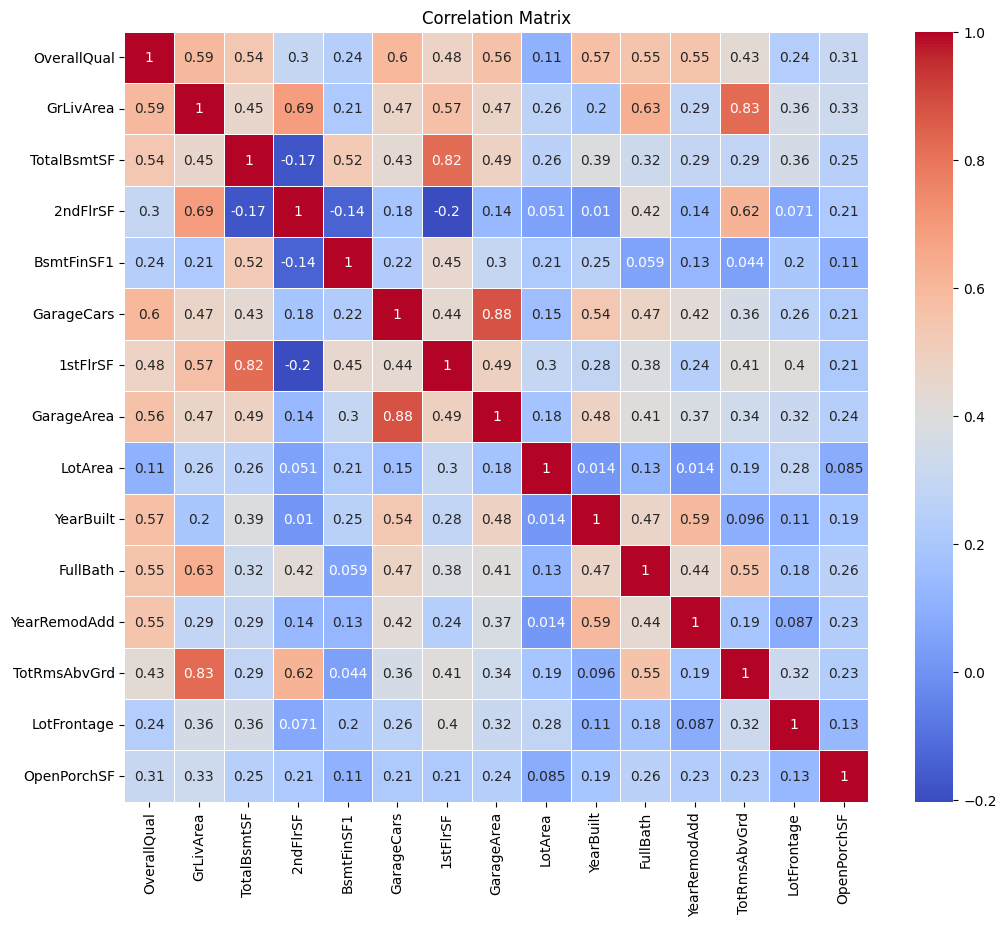

In [22]:
# Calculate the correlation matrix between all the features
correlation_matrix = home_data[top_features.Feature].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**5. Train-Test Split:** Split the data into training and testing sets to build and evaluate machine learning models effectively.

In [9]:
# Create X (After completing the exercise, you can return to modify this line!)
# Potential features: 'MSSubClass', 'LotArea','OverallQual' ,'OverallCond','YearBuilt',
# 'YearRemodAdd','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea', 'FullBath','HalfBath', 'BedroomAbvGr'
# 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 
# 'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold'


# Select columns corresponding to features, and preview the data
X = home_data[features]
X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

NameError: name 'features' is not defined

# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [ ]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

RandomForestRegressor(random_state=1)

Now, read the file of "test" data, and apply your model to make predictions.

In [ ]:
# path to file you will use for predictions
test_data_path = '../input/home-data-for-ml-course/train.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

# Comprobar el error
#print(test_data.columns)
# rf_val_mae = mean_absolute_error(test_preds, test_Y)

FileNotFoundError: [Errno 2] No such file or directory: '../input/home-data-for-ml-course/train.csv'

Before submitting, run a check to make sure your `test_preds` have the right format.

In [ ]:
# Check your answer (To get credit for completing the exercise, you must get a "Correct" result!)
step_1.check()
# step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [ ]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('7.submission.csv', index=False)